In [2]:
# definindo workdir
from google.colab import drive
drive.mount('/content/drive')
workdir = '/content/drive/MyDrive/EP - MAC0417 5768'


Mounted at /content/drive


In [ ]:
# gera sumário do dataset
dataset_dir = f'{workdir}/dataset'

import glob
import os
import pandas as pd

image_files = []
size = 0
for path, currentDirectory, files in os.walk(dataset_dir):
    for file in files:
        image_files.append(os.path.join(path, file))
        size += os.path.getsize(image_files[-1])

n_classes = 10
n_images = len(image_files)
dataset_size = round(size/1e6, 2) # size in MB
image_sizes = '640x480'

image_summary = pd.DataFrame(
    {
        'Descrição': ['Nº de Classes', 'Nº de Imagens', 'Tamanho da Base (MB)', 'Resolução das Imagens'],
        'Valor': [n_classes, n_images, dataset_size, image_sizes],
     }
)
print(image_summary.to_latex(index=False))

\begin{tabular}{ll}
\toprule
            Descrição &   Valor \\
\midrule
        Nº de Classes &      10 \\
        Nº de Imagens &    1369 \\
 Tamanho da Base (MB) &  601.89 \\
Resolução das Imagens & 640x480 \\
\bottomrule
\end{tabular}



# Gerar um função para criar o sumário e mnist e fazer isso para cada um dos datasets (cinza, aumentado, e normalizado) e para cada uma das transformações. Provavelmente será colocado no apêndice

In [3]:
import glob
import os
import pandas as pd

import numpy as np
import random
import imageio as imgio
from matplotlib import pyplot as plt
from skimage.transform import rotate


/content/drive/MyDrive/EP - MAC0417 5768/dataset/caneca/caneca_obj1_p1_de_f2.png


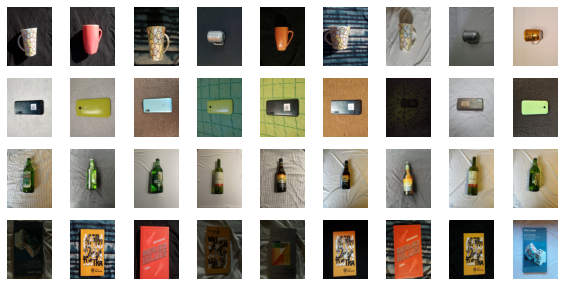

/content/drive/MyDrive/EP - MAC0417 5768/dataset_gray/sapato/sapato_obj3_p1_di_f3.png


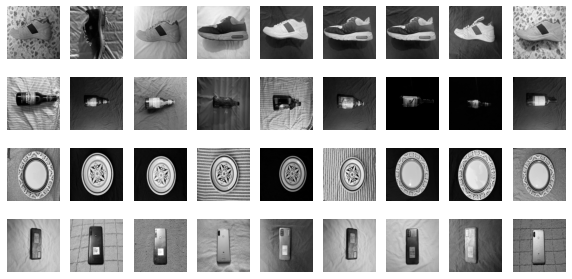

/content/drive/MyDrive/EP - MAC0417 5768/dataset_augmented/caneca/caneca_obj1_p1_di_f2_log.png


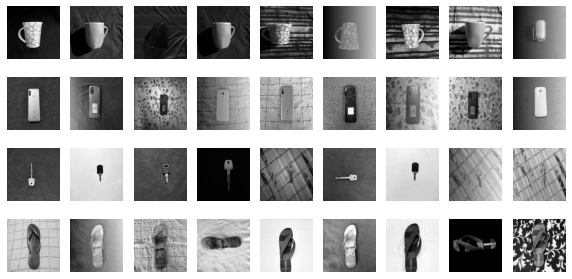

/content/drive/MyDrive/EP - MAC0417 5768/dataset_normalized/chinelo/chinelo_obj4_p1_de_f1_log.png


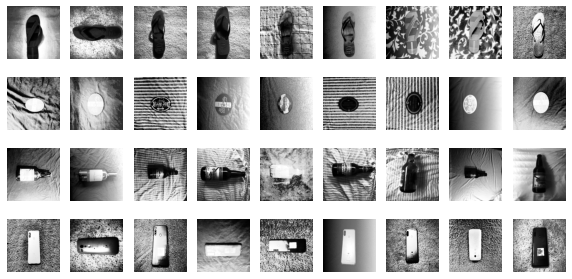

In [13]:
def get_dataset_summary(dataset_name, expected_size, color_map='viridis'):

  # gera sumário do dataset
  dataset_dir = f'{workdir}/{dataset_name}'
  image_files = []
  size = 0
  for path, currentDirectory, files in os.walk(dataset_dir):
      for file in files:
          image_files.append(os.path.join(path, file))
          size += os.path.getsize(image_files[-1])

  # Gerando imagem com amostra de 36 figuras, 4 linhas(classes) e 9 colunas(exemplares)
  classes = random.sample(
          ['celular','livro','sapato','chinelo','caneca','portacopo','garrafa','prato','tesoura','chave'],
          4
  )

  # Para cada classe, irei obter 9 exemplares (na mesma pose, para melhor visualização)
  sample_figs = []
  for classe in classes:
    classe_files = [x for x in image_files if x.find(classe) != -1 and x.find('p1') != -1]
    sample_files = random.sample(classe_files, 9)
    sample_figs = sample_figs + sample_files


  figs = [imgio.imread(x) for x in sample_figs]

  wrong_sizes = [id for id, val in enumerate(figs) if val.shape[0] != expected_size[0]]
  f = plt.figure(figsize=(10, 5))

  for i, fig in enumerate(figs):
    f.add_subplot(4, 9, i+1)
    if i in wrong_sizes:
      fig = rotate(fig, 90, resize=True)
    plt.imshow(fig, cmap=color_map)
    plt.axis('off')
  plt.show()


get_dataset_summary('dataset', (640, 480))
get_dataset_summary('dataset_gray', (256, 256), 'gray')
get_dataset_summary('dataset_augmented', (256, 256), 'gray')
get_dataset_summary('dataset_normalized', (256, 256), 'gray')